In [5]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [6]:
df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    names = ["s_length", "s_width", "p_length", "p_width", "class"]
)
print(df.shape)
df.head()

(150, 5)


,s_length,s_width,p_length,p_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


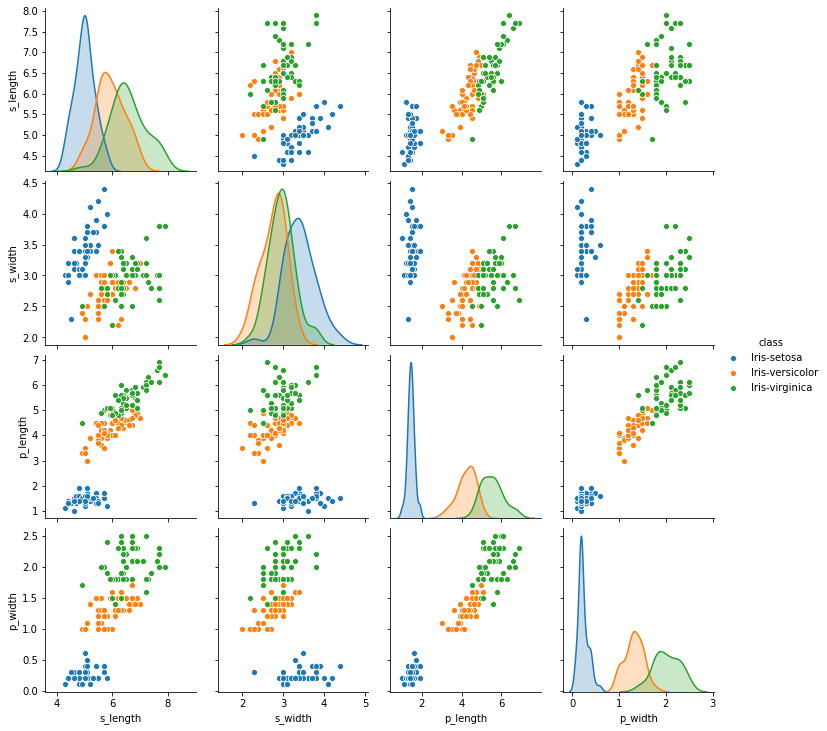

In [8]:
sns.pairplot(data=df, vars=('s_length','s_width','p_length','p_width'), hue='class')

In [148]:
np.unique(df['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [149]:
indexes = df[df['class'] == 'Iris-virginica'].index

In [150]:
df = df.drop(indexes)

In [151]:
df = df.drop(columns=['s_width', 'p_width'])

In [152]:
df.head()

,s_length,p_length,class
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa


In [153]:
df.loc[df['class'] == 'Iris-setosa', 'class'] = 0

In [154]:
df.loc[df['class'] == 'Iris-versicolor', 'class'] = 1

In [155]:
df.head()

,s_length,p_length,class
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [156]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

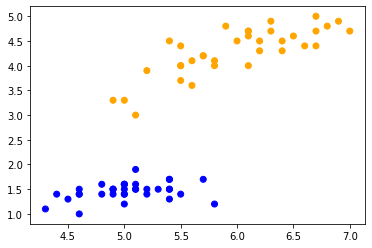

In [157]:
colors = ['blue','orange']
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

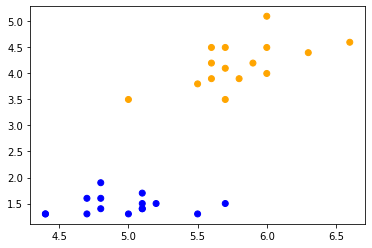

In [158]:
colors = ['blue','orange']
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

In [159]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [160]:
# Apply the scaler to the X training data
X_train_std = sc.transform(X_train)

# Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

In [161]:
clf = Perceptron(eta0=0.1, random_state=0)

In [162]:
clf.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [163]:
clf.score(X_test_std, y_test)

1.0